In [24]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [25]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [26]:
import pandas as pd
import numpy as np
import os
import shutil
from glob import glob

In [27]:
# try to see if t7 mlde is better
pre_cut = pd.read_csv("results/mlde_2/vis/all_df.csv")
post_cut = pd.read_csv("results/mlde_3/vis/all_df.csv")

In [28]:
pre_cut["round"] = "pre"
post_cut["round"] = "post"

In [29]:
all_df = pd.concat([pre_cut, post_cut])
all_t7 = all_df[all_df["lib"] == "T7"]
all_t7

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit,round
0,one-hot,boosting,192,4000,0,0.353947,-0.725495,0.772854,-0.652027,0.901889,0.068644,0.0,6053.0,all,T7,Triad_score,384,max,pre
1,one-hot,boosting,192,4000,1,-0.006285,-0.657884,0.753421,-0.684934,0.895304,0.073545,0.0,1138.0,all,T7,Triad_score,384,max,pre
2,one-hot,boosting,192,4000,2,0.344423,-0.666008,0.753421,-0.593586,0.906548,0.087193,0.0,1133.0,all,T7,Triad_score,384,max,pre
3,one-hot,boosting,192,4000,3,0.300714,-0.663973,0.772854,-0.638833,0.899634,0.049619,0.0,5632.0,all,T7,Triad_score,384,max,pre
4,one-hot,boosting,192,4000,4,0.298176,-0.759246,0.665273,-0.665856,0.901516,0.074792,0.0,2825.0,all,T7,Triad_score,384,max,pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61995,one-hot,ridge,48,6725,45,0.243622,0.029347,0.569262,0.014532,0.518184,0.022129,0.0,207.0,all,T7,none,96,max,post
61996,one-hot,ridge,48,6725,46,0.380564,0.044109,0.917147,0.032903,0.504985,0.021881,0.0,5310.0,all,T7,none,96,max,post
61997,one-hot,ridge,48,6725,47,0.433399,0.028382,0.753421,0.206215,0.655539,0.095066,0.0,3059.0,all,T7,none,96,max,post
61998,one-hot,ridge,48,6725,48,0.474743,0.029326,0.753421,0.087449,0.600972,0.065968,0.0,3472.0,all,T7,none,96,max,post


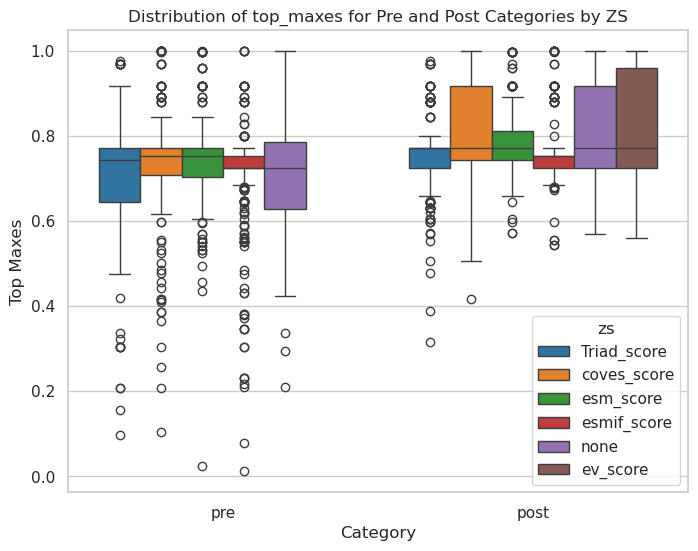

In [30]:
# for top_maxes column, plot the distribution of the values
# as catagorical one cat for pre and the other post
# color different zs
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create the categorical plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="round", y="top_maxes", hue="zs", data=all_t7[(all_t7["n_top"]==96) & (all_t7["n_sample"] == 384)], palette="tab10")

# Adding titles and labels
plt.title("Distribution of top_maxes for Pre and Post Categories by ZS")
plt.xlabel("Category")
plt.ylabel("Top Maxes")

# Show the plot
plt.show()

In [31]:
all_tev = all_df[all_df["lib"] == "TEV"]
all_tev

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit,round
6000,one-hot,boosting,192,80000,0,0.214711,0.007887,0.512076,-0.055422,0.991029,0.033916,0.0,10821.0,all,TEV,Triad_score,384,max,pre
6001,one-hot,boosting,192,80000,1,0.325281,0.005864,0.673365,-0.021418,0.991503,0.050694,0.0,1966.0,all,TEV,Triad_score,384,max,pre
6002,one-hot,boosting,192,80000,2,0.148010,0.001953,0.516635,-0.029305,0.991119,0.048160,0.0,548.0,all,TEV,Triad_score,384,max,pre
6003,one-hot,boosting,192,80000,3,0.134031,0.007656,0.464461,0.028386,0.991701,0.042773,0.0,125303.0,all,TEV,Triad_score,384,max,pre
6004,one-hot,boosting,192,80000,4,0.170326,-0.000438,0.583158,-0.020504,0.991496,0.044163,0.0,1925.0,all,TEV,Triad_score,384,max,pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,one-hot,ridge,48,159132,45,0.240913,0.012569,0.291104,0.000272,0.991152,0.010287,0.0,110209.0,all,TEV,none,96,max,post
63996,one-hot,ridge,48,159132,46,0.095692,-0.001581,0.312305,0.009614,0.991590,0.047238,0.0,19530.0,all,TEV,none,96,max,post
63997,one-hot,ridge,48,159132,47,0.222778,-0.003026,0.340312,-0.018326,0.991022,-0.006399,0.0,104396.0,all,TEV,none,96,max,post
63998,one-hot,ridge,48,159132,48,0.181744,0.004327,0.345371,-0.003138,0.991150,0.013270,0.0,11840.0,all,TEV,none,96,max,post


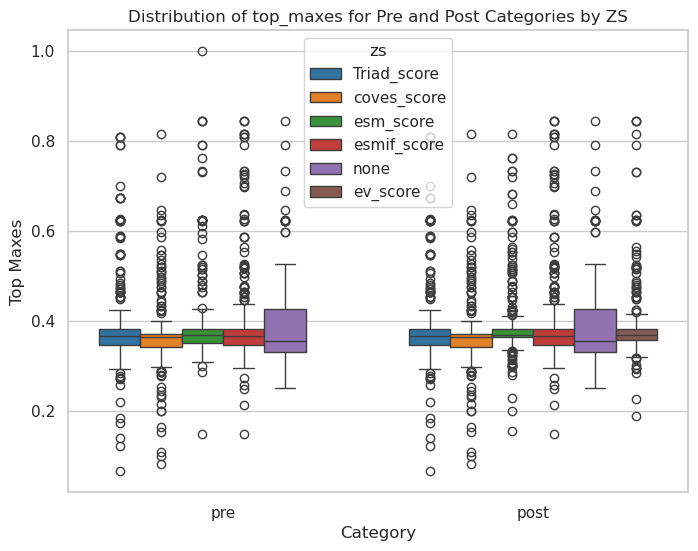

In [32]:
# Create the categorical plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="round", y="top_maxes", hue="zs", data=all_tev[(all_tev["n_top"]==96) & (all_tev["n_sample"] == 384)], palette="tab10")

# Adding titles and labels
plt.title("Distribution of top_maxes for Pre and Post Categories by ZS")
plt.xlabel("Category")
plt.ylabel("Top Maxes")

# Show the plot
plt.show()

In [33]:
# try to see if t7 mlde is better
ds_pre_cut = pd.read_csv("results/mlde_hm2zs_2/vis/all_df.csv")
ds_post_cut = pd.read_csv("results/mlde_hm2zs_3/vis/all_df.csv")

In [34]:
ds_pre_cut["round"] = "pre"
ds_post_cut["round"] = "post"

ds_all_df = pd.concat([ds_pre_cut, ds_post_cut])

In [35]:
ds_t7_df = ds_all_df[ds_all_df["lib"] == "T7"]
ds_tev_df = ds_all_df[ds_all_df["lib"] == "TEV"]

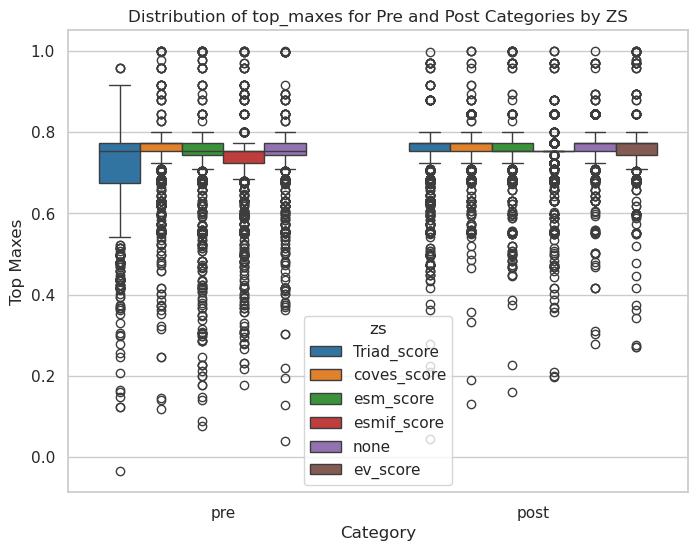

In [36]:
# for top_maxes column, plot the distribution of the values
# as catagorical one cat for pre and the other post
# color different zs
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create the categorical plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="round", y="top_maxes", hue="zs", data=ds_t7_df[(ds_t7_df["n_top"]==96) ], palette="tab10")

# Adding titles and labels
plt.title("Distribution of top_maxes for Pre and Post Categories by ZS")
plt.xlabel("Category")
plt.ylabel("Top Maxes")

# Show the plot
plt.show()

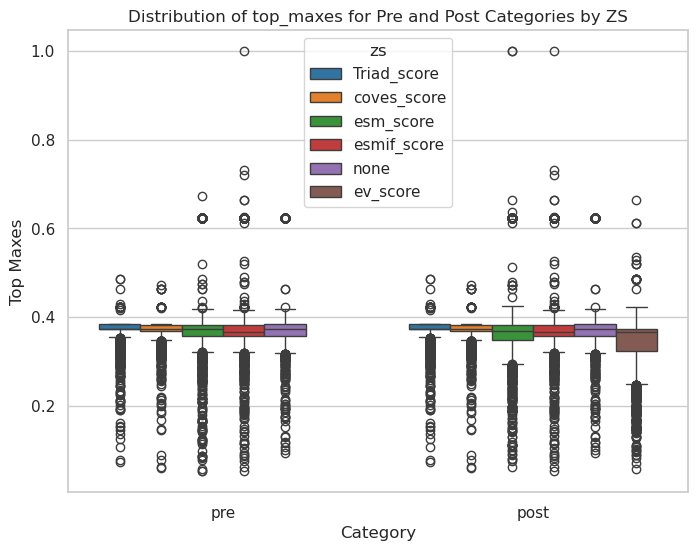

In [37]:
# for top_maxes column, plot the distribution of the values
# as catagorical one cat for pre and the other post
# color different zs
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create the categorical plot
plt.figure(figsize=(8, 6))
sns.boxplot(x="round", y="top_maxes", hue="zs", data=ds_tev_df[(ds_tev_df["n_top"]==96)], palette="tab10")

# Adding titles and labels
plt.title("Distribution of top_maxes for Pre and Post Categories by ZS")
plt.xlabel("Category")
plt.ylabel("Top Maxes")

# Show the plot
plt.show()